In [4]:
pip install seaborn

     ---------------------------------------- 0.0/167.0 kB ? eta -:--:--
     --------- ----------------------------- 41.0/167.0 kB 1.9 MB/s eta 0:00:01
     -------------------------------------- 167.0/167.0 kB 2.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   --------------------------------------- 294.9/294.9 kB 17.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/7.8 MB 65.5 MB/s eta 0:00:01
   ------- -------------------------------- 1.5/7.8 MB 15.5 MB/s eta 0:00:01
   --------- ------------------------------ 1.8/7.8 MB 13.1 MB/s eta 0:00:01
   ----------- ---------------------------- 2.2/7.8 MB 11.8 MB/s eta 0:00:01
   ------------ --------------------------- 2.4/7.8 MB 11.1 MB/s eta 0:00:01
   -------------- ------------------------- 2.8/7.8 MB 9.8 MB/s eta 0:00:01
   --------------- ------------------------ 3.0/7.8 MB 9.6 MB/s eta 0:00:01
   -------


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv(r"C:\Users\Admin\OneDrive\Documents\telco customer churn\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [4]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df["TotalCharges"]=df["TotalCharges"].replace(" ","0")
df["TotalCharges"]=df["TotalCharges"].astype("float")

In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [9]:
df["customerID"].duplicated().sum()

np.int64(0)

In [10]:
def conv(value):
    if value==1:
        return "yes"
    else:
        return "no"

df['SeniorCitizen']= df['SeniorCitizen'].apply(conv)

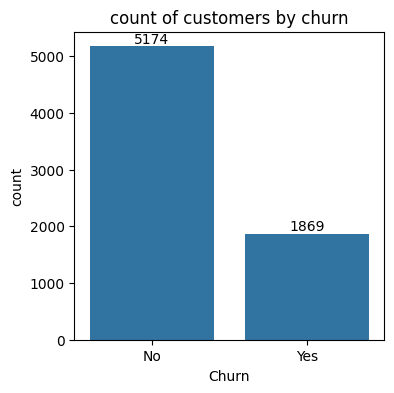

In [11]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x='Churn',data=df)

ax.bar_label(ax.containers[0])
plt.title("count of customers by churn")
plt.show()

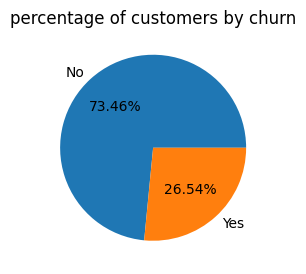

In [12]:
plt.figure(figsize=(3,4))
gb=df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'],labels=gb.index,autopct="%1.2f%%")
plt.title("percentage of customers by churn")
plt.show()

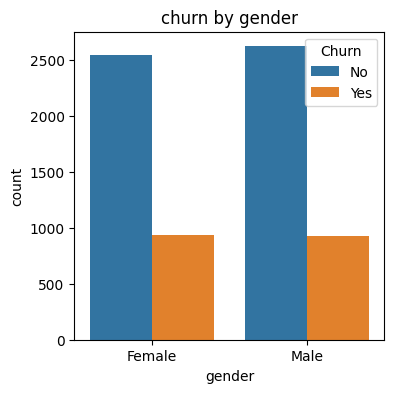

In [13]:
plt.figure(figsize=(4,4))
sns.countplot(x="gender",data=df,hue="Churn")
plt.title("churn by gender")
plt.show()

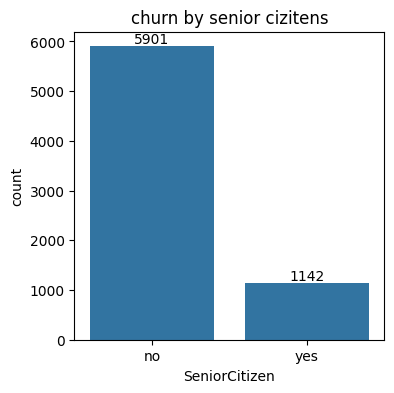

In [14]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x="SeniorCitizen",data=df)
ax.bar_label(ax.containers[0])
plt.title("churn by senior cizitens")
plt.show()

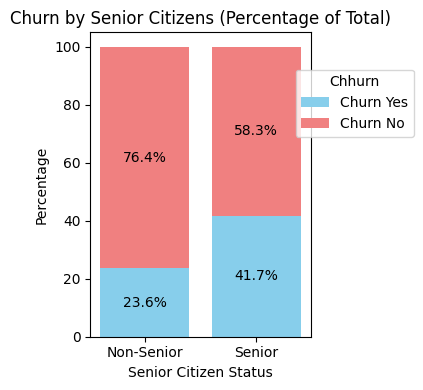

In [15]:
# Calculate percentage of Churn within each Senior Citizen group
grouped = df.groupby(['SeniorCitizen', 'Churn']).size().unstack()
percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Plot the stacked bar chart
categories = percentages.index
churn_yes = percentages['Yes']
churn_no = percentages['No']

plt.figure(figsize=(4, 4))

# Stacked bar chart
plt.bar(categories, churn_yes, label='Churn Yes', color='skyblue')
plt.bar(categories, churn_no, bottom=churn_yes, label='Churn No', color='lightcoral')

# Add percentages as labels
for i, (yes, no) in enumerate(zip(churn_yes, churn_no)):
    plt.text(i, yes / 2, f"{yes:.1f}%", ha='center', va='center', color='black')
    plt.text(i, yes + no / 2, f"{no:.1f}%", ha='center', va='center', color='black')

# Customize the chart
plt.title("Churn by Senior Citizens (Percentage of Total)")
plt.xlabel("Senior Citizen Status")
plt.ylabel("Percentage")
plt.xticks(categories, labels=["Non-Senior", "Senior"])
plt.legend(title='Chhurn',bbox_to_anchor=(0.9,0.9))
plt.tight_layout()
plt.show()


#comparatively a greater percentage of people in senior citizen category have churned

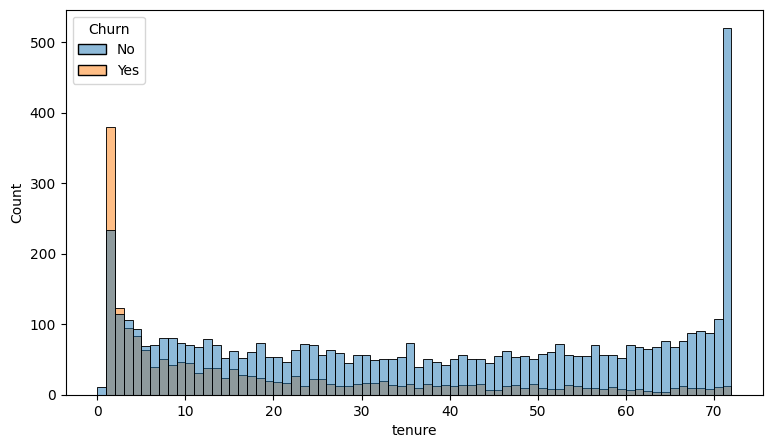

In [16]:
plt.figure(figsize=(9,5))
sns.histplot(x="tenure",data=df,bins=72,hue="Churn")
plt.show()

#people who have used our services for l0ong time have stayed and people who have used for less   time have churned


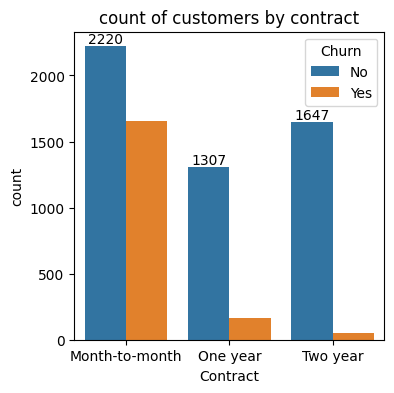

In [17]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x='Contract',data=df,hue="Churn")
ax.bar_label(ax.containers[0])
plt.title("count of customers by contract")
plt.show()

# people who have month to month contract are likely to churn more from those who have one or two years contract

In [18]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

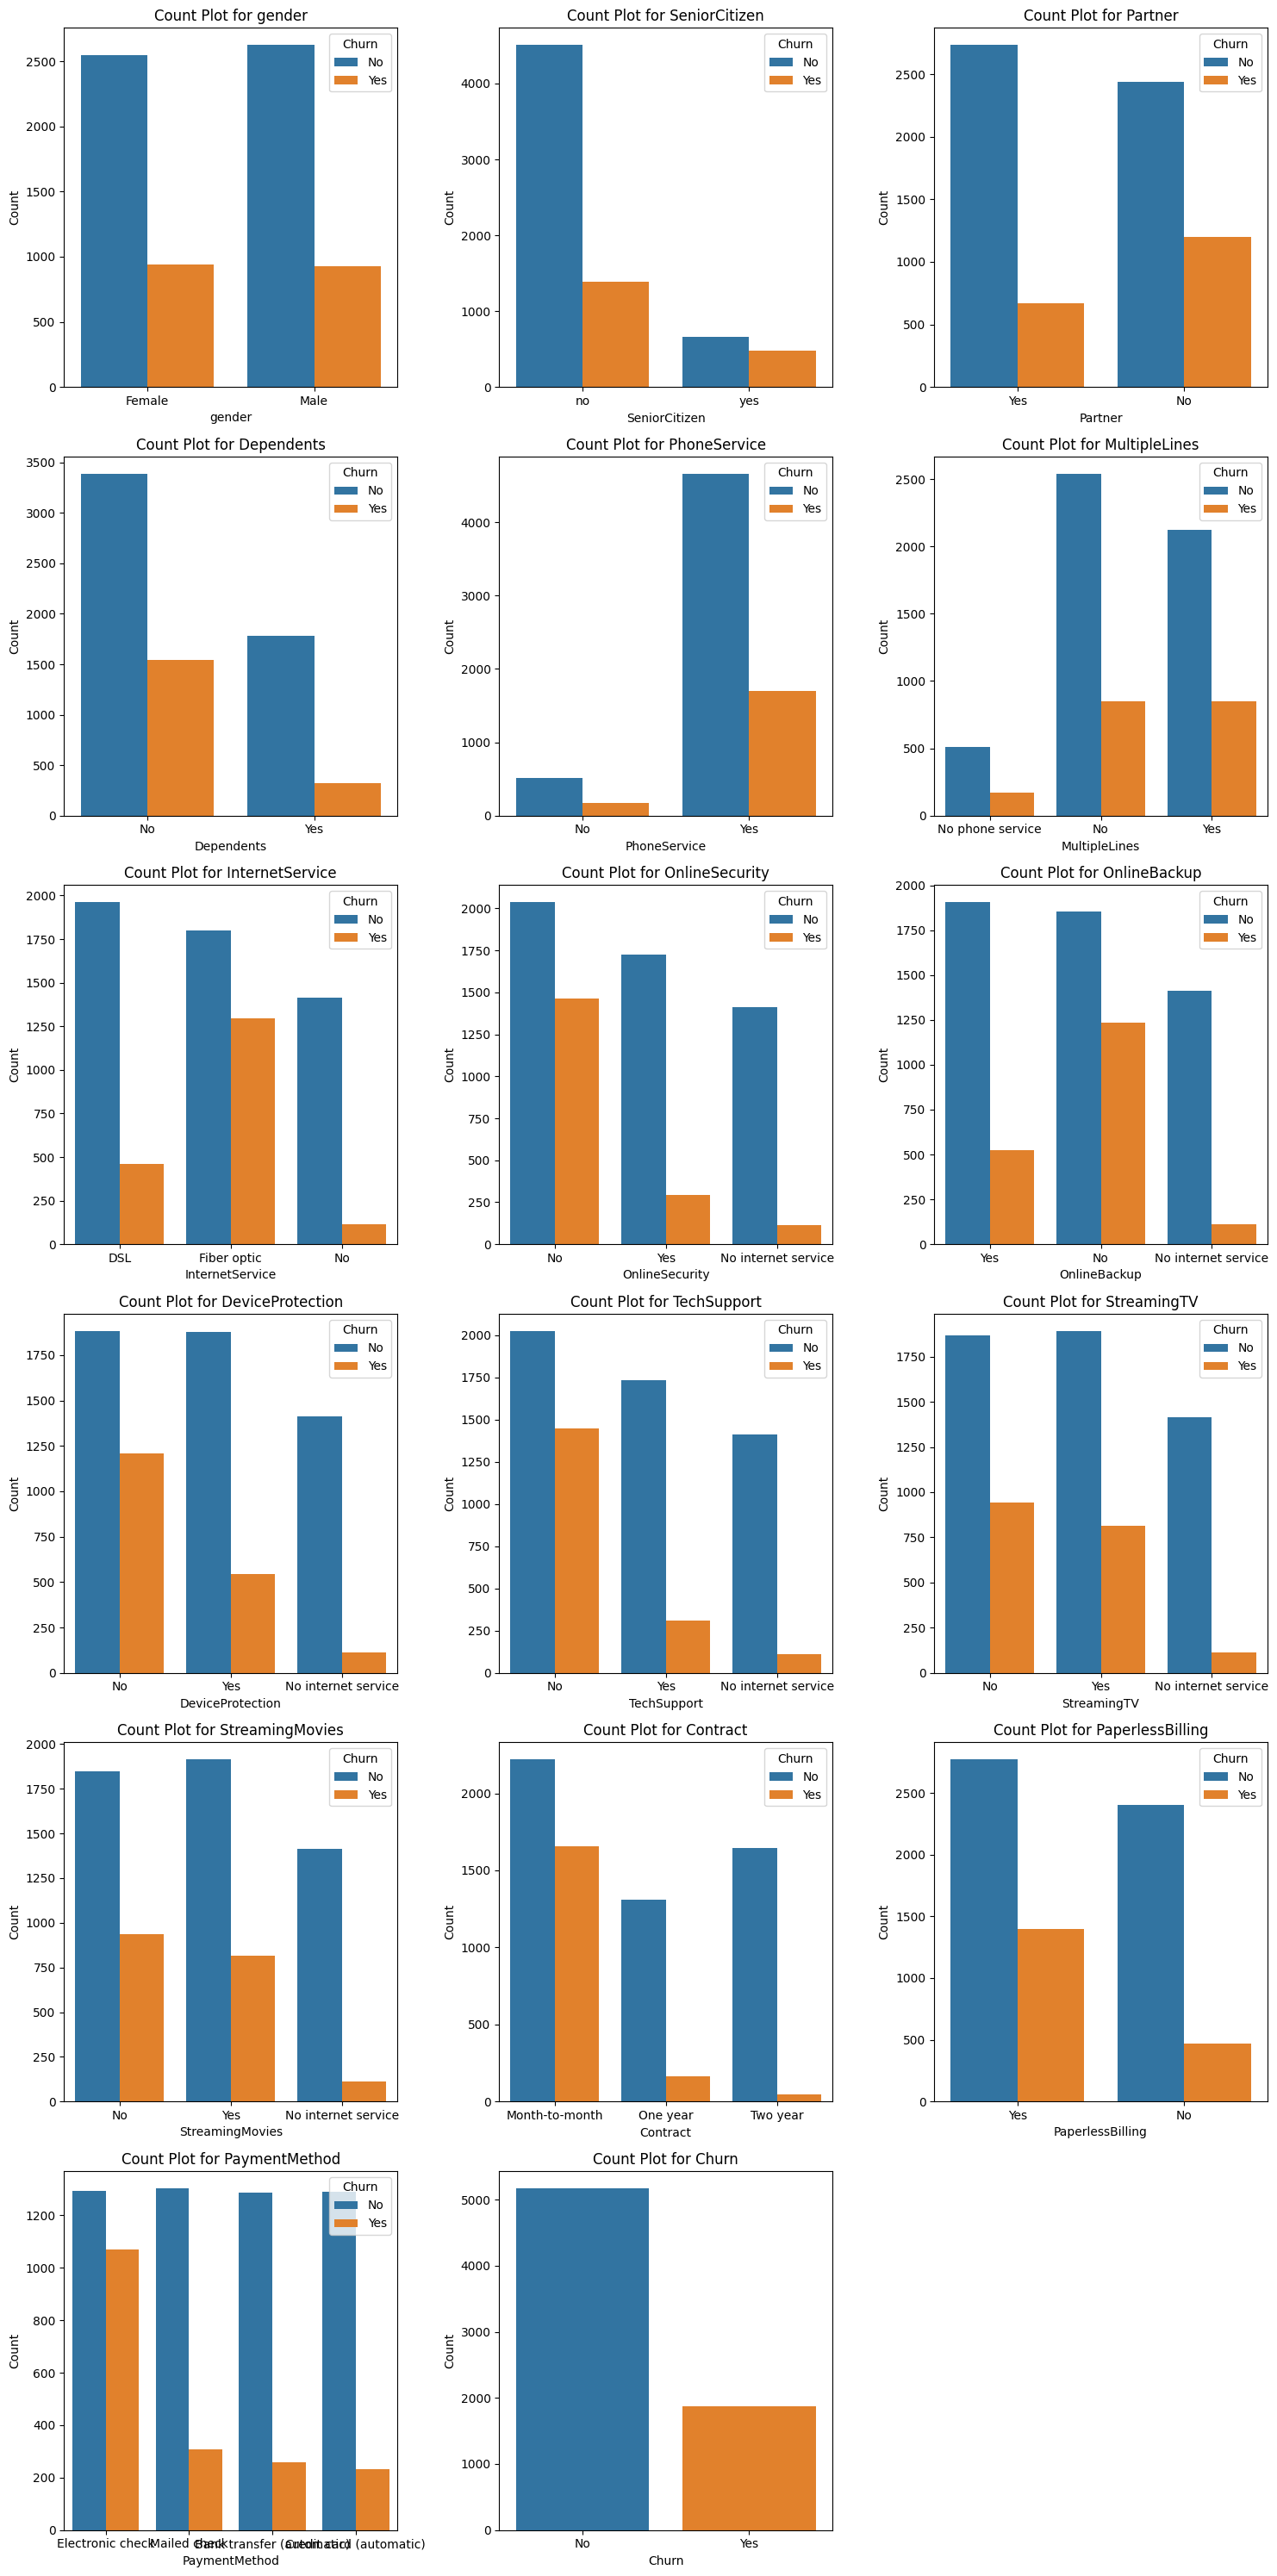

In [19]:
import math

# List of columns to plot
columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
           'PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
           'PaperlessBilling', 'PaymentMethod', 'Churn']

# Number of subplots (rows and columns)
n_cols = 3  # Number of columns per row in subplots
n_rows = math.ceil(len(columns) / n_cols)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()  # Flatten to easily iterate through axes

# Plot each column
for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, ax=axes[i],hue=df["Churn"])
    axes[i].set_title(f"Count Plot for {col}")
    axes[i].set_ylabel('Count')
    axes[i].set_xlabel(col)

# Hide any unused subplots
for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


#The provided subplots summarize the distribution of customer attributes across various categorical variables in the dataset, segmented by "Churn" status (Yes/No). Most categories, like "InternetService," "OnlineSecurity," and "Contract," exhibit notable variations between customers who churned and those who didn’t. Observations suggest that specific factors like contract type and internet service might significantly influence customer churn.

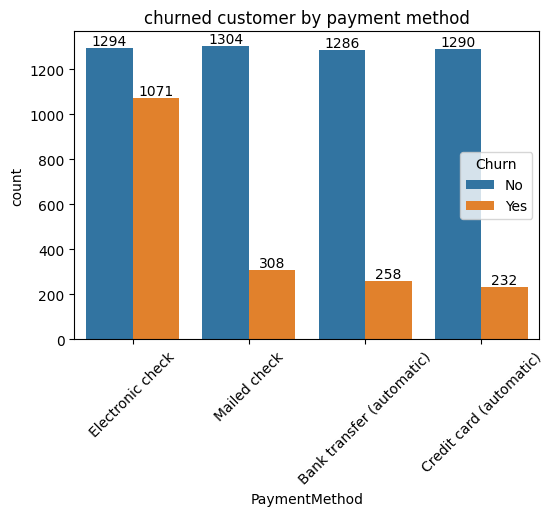

In [21]:
plt.figure(figsize=(6,4))
ax=sns.countplot(x='PaymentMethod',data=df,hue="Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("churned customer by payment method")
plt.xticks(rotation=45)
plt.show()

#customer is likely to churn when he is using electronic cheque  as payment